In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')
## Cleaning up the data
df.columns=["Month","Sales"]
df.dropna(axis=0, inplace=True)
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [38]:
df.shape

(105, 2)

In [39]:
train = df.iloc[:80, :]
test = df.iloc[80:, :]

In [40]:
train.set_index('Month',inplace=True)

## Step 2: Visualize the Data

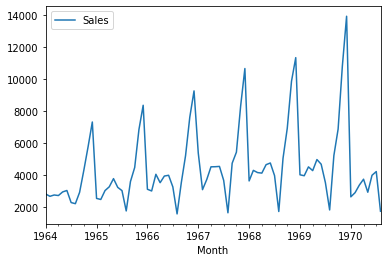

In [5]:
train.plot()

In [6]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [7]:
test_result=adfuller(train['Sales'])

In [8]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [9]:
adfuller_test(train['Sales'])

ADF Test Statistic : -2.0599261121740375
p-value : 0.26093067267472186
#Lags Used : 11
Number of Observations Used : 68
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [10]:
train['Sales First Difference'] = train['Sales'] - train['Sales'].shift(1)

/home/rasel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
train['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1970-04-01    3370.0
1970-05-01    3740.0
1970-06-01    2927.0
1970-07-01    3986.0
1970-08-01    4217.0
Name: Sales, Length: 80, dtype: float64

In [12]:
train['Seasonal First Difference']=train['Sales']-train['Sales'].shift(12)

/home/rasel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
train.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [14]:
## Again test dickey fuller test
adfuller_test(train['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.847641325912471
p-value : 1.7263943289972502e-09
#Lags Used : 0
Number of Observations Used : 67
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


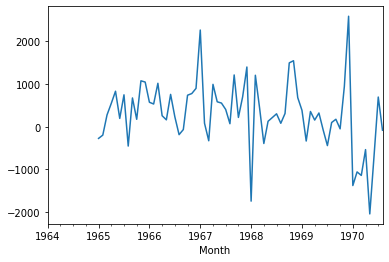

In [15]:
train['Seasonal First Difference'].plot()

## Auto Regressive Model
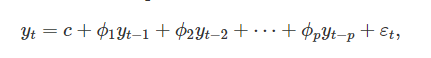

In [16]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(train['Sales'])
plt.show()

ModuleNotFoundError: No module named 'pandas.tools'

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [17]:
import statsmodels.api as sm

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

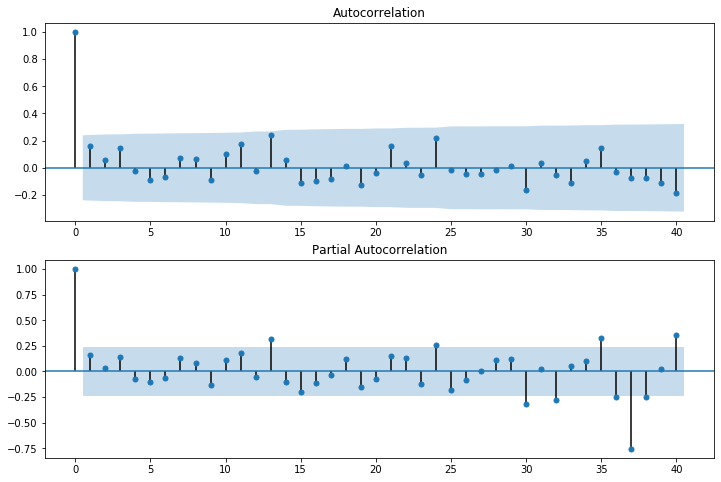

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [20]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [21]:
train.dropna(axis=0, inplace=True)

/home/rasel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
model=ARIMA(train['Sales'],order=(1,1,1))
model_fit=model.fit()

/home/rasel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/rasel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [23]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   67
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -611.431
Method:                       css-mle   S.D. of innovations           2170.980
Date:                Thu, 28 May 2020   AIC                           1230.861
Time:                        14:16:57   BIC                           1239.680
Sample:                    02-01-1965   HQIC                          1234.351
                         - 08-01-1970                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            20.5876     24.633      0.836      0.403     -27.692      68.868
ar.L1.D.Sales     0.4760      0.112      4.238      0.000       0.256       0.696
ma.L1.D.Sales    -1.0000      0.042    -23.569      0.000      -1.083      -0.917
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.1007           +0.0000j            2.1007            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

/home/rasel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


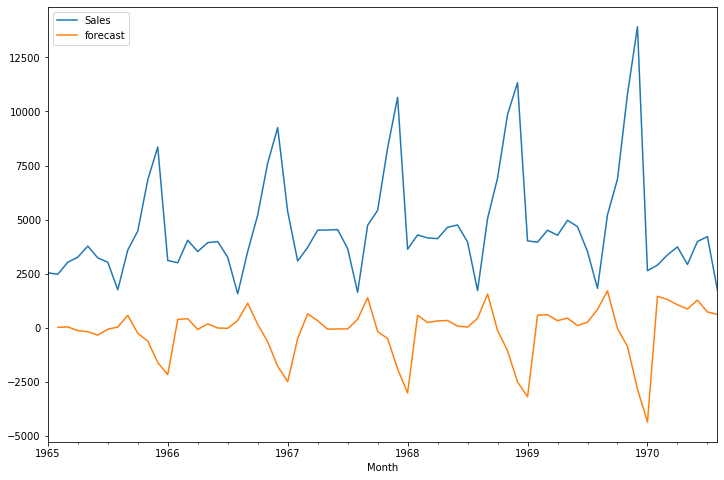

In [24]:
train['forecast']=model_fit.predict(start=1,end=80)
train[['Sales','forecast']].plot(figsize=(12,8))

In [25]:
model=sm.tsa.statespace.SARIMAX(train['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/home/rasel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/rasel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/rasel/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


/home/rasel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


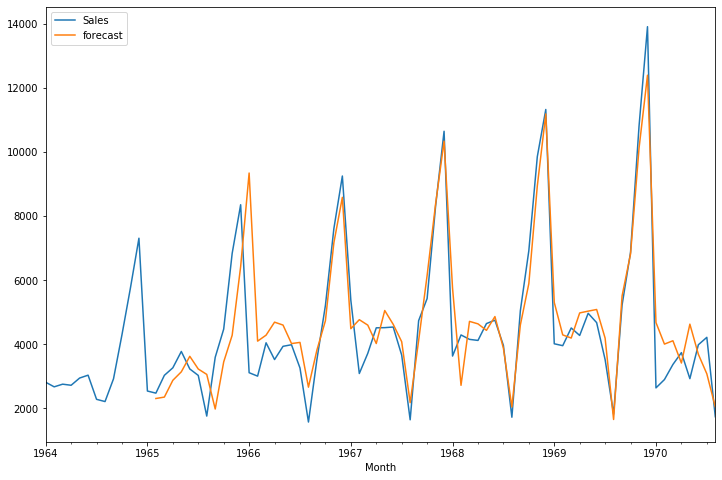

In [41]:
train['forecast']=results.predict(start=1,end=80)
train[['Sales','forecast']].plot(figsize=(12,8))

In [43]:
test.set_index('Month',inplace=True)

KeyError: "None of ['Month'] are in the columns"

In [44]:
test

,Sales
Month,
1970-09-01,5221.0
1970-10-01,6424.0
1970-11-01,9842.0
1970-12-01,13076.0
1971-01-01,3934.0
1971-02-01,3162.0
1971-03-01,4286.0
1971-04-01,4676.0
1971-05-01,5010.0


In [46]:
forecast=results.predict(start=81,end=105)

In [50]:
forecast

1971-10-01     6640.345053
1971-11-01    10564.466915
1971-12-01    13674.347172
1972-01-01     2396.826907
1972-02-01     2655.967176
1972-03-01     3126.804021
1972-04-01     3496.838645
1972-05-01     2683.861998
1972-06-01     3742.688427
1972-07-01     3973.592225
1972-08-01     1494.645762
1972-09-01     4619.715600
1972-10-01     6670.917256
1972-11-01    10231.771150
1972-12-01    12742.628322
1973-01-01     2945.952718
1973-02-01     2448.843191
1973-03-01     3034.492100
1973-04-01     3677.709471
1973-05-01     2999.266537
1973-06-01     3718.022304
1973-07-01     3755.794840
1973-08-01     1399.104032
1973-09-01     4762.500215
1973-10-01     6397.046851
Freq: MS, dtype: float64

In [51]:
train

,Sales,forecast
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
...,...,...
1970-04-01,3740.0,3415.448545
1970-05-01,2927.0,4628.783433
1970-06-01,3986.0,3689.411990


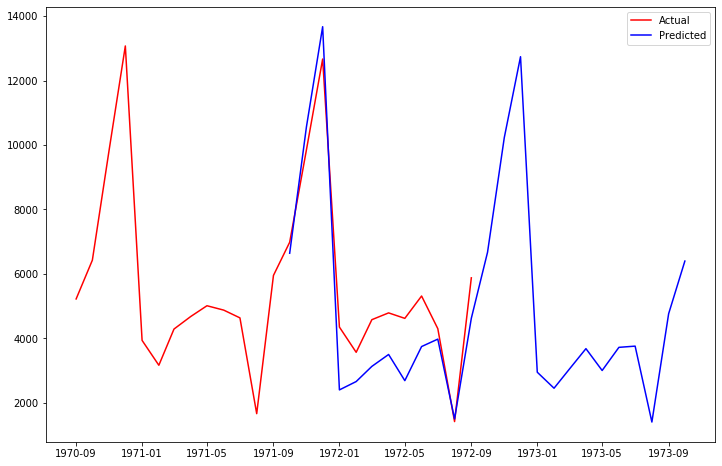

In [47]:
# Visualising the results
plt.figure(figsize=(12, 8))
plt.plot(test['Sales'], color = 'red', label = 'Actual')
plt.plot(forecast, color = 'blue', label = 'Predicted')
plt.legend()
plt.show()

In [30]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

TypeError: unsupported operand type(s) for +: 'int' and 'relativedelta'

In [49]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [50]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [51]:
df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
Month,,,,
1972-05-01,4618.0,-170.0,-392.0,NaN
1972-06-01,5312.0,694.0,438.0,NaN
1972-07-01,4298.0,-1014.0,-335.0,5117.370780
1972-08-01,1413.0,-2885.0,-246.0,2009.612344
1972-09-01,5877.0,4464.0,-74.0,6056.568693


In [52]:
future_df=pd.concat([df,future_datest_df])

/home/rasel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


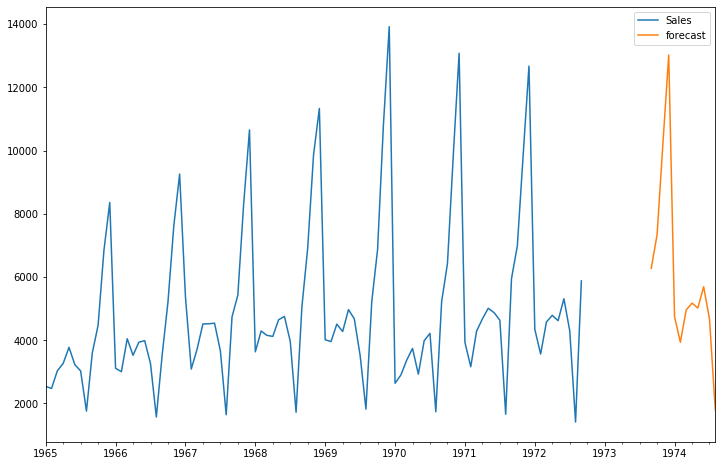

In [53]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

/home/rasel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


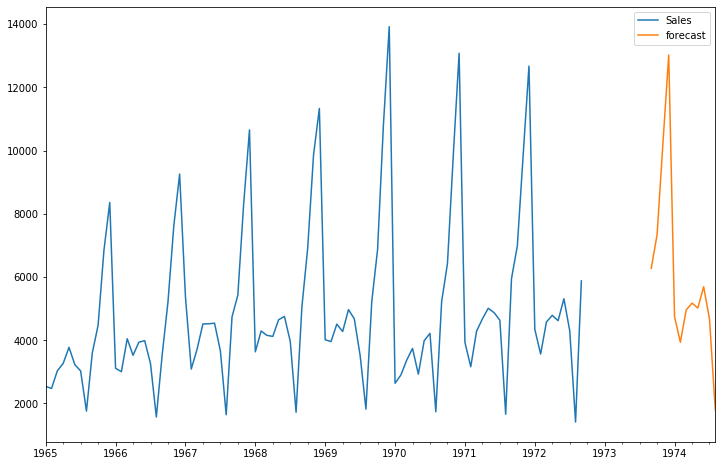

In [54]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 